<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> Utilities </font></h3>

In [2]:
def imshow(im):
    width, height, *channels = im.shape
    plt.figure(figsize=(10,10))
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [3]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

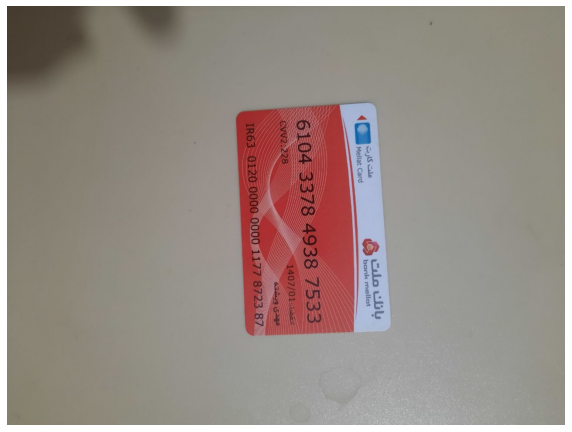

In [11]:
im = cv2.imread("images/Q4/4_4.jpg")
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

298
5
8
6
10
11
5
5
7
5
12
8
9
10
9
5
7
10
7
6
12
6
5
6
9
4
6
6
8
9
11
4
5
6
5
5
8
8
5
5
5
5
6
5
7
9
7
11
5
10
9
8
8
6
8
5
9
9
10
8
6
9
10
8
8
6
14
8
7
4
12
6
5
7
5
7
8
10
11
4
5
4
7
5
8
4
4
4
4
5
5
10
5
5
5
4
10
9
12
8
10
6
9
7
8
5
5
6
8
4
10
6
9
9
6
9
9
5
5
4
6
6
7
6
8
4
4
8
5
8
6
6
4
6
10
6
9
6
8
9
8
4
6
8
6
4
6
4
4
5
4
10
5
5
4
5
8
10
9
9


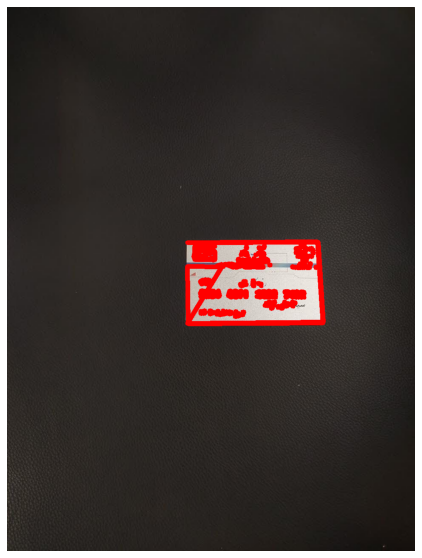

In [10]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
im_gaussian = cv2.GaussianBlur(im_gray, (15,15), 40)
ret, thresh = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
edges = cv2.Canny(np.uint8(thresh), 5, 30) # I changed this many times
# edges = cv2.dilate(edges, np.ones((9,9)))
# edges = cv2.erode(edges, np.ones((9,9)))
contours, hierarchy = cv2.findContours(edges//255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb_img = im.copy()
print(len(contours))
for cnt in contours:
        # indicates how much accurate approxPolyDP works. to be precise, it is the maximum distance between
        # original contour and approximated one. sum of distances between consecutive points on a shape indicates
        # the perimeter of that shape. this sum of distances between consecutive points in the approximated contour
        # is different since it reduces number of points. epsilon specifies the maximum difference of this perimeter 
        # value in original one and approximated one
        epsilon = 0.03 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        if(len(approx) < 4):
                continue
        print(len(approx))
        cv2.drawContours(rgb_img, [approx], -1, (0, 0, 255), 10)
p1,p2,p3,p4 = approx[0][0], approx[1][0], approx[2][0], approx[3][0]
src_pts = np.float32([p1,p2,p3,p4])
dst_pts = np.float32([[0,0], [0, im.shape[1]], [im.shape[0], im.shape[1]], [im.shape[0], 0]])
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(rgb_img, M, (im.shape[0], im.shape[1]))
# imshow(cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY))
imshow(rgb_img)


<h3><font color = "#079e05"> Show the result </font></h3>

#### making the quality better

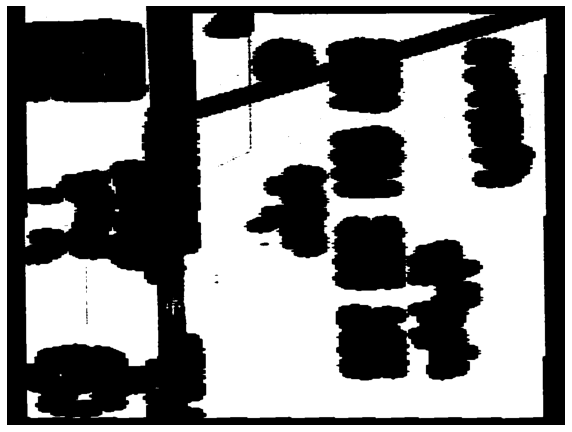

In [6]:
ret, thresh = cv2.threshold(cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY), 170, 255, cv2.THRESH_BINARY)
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpened = cv2.filter2D(thresh, -1, kernel)
imshow(thresh)